# Part I: Maximum Likelihood Estimation (MLE)

### 

### Suppose we have coin and want to estimate the probability of heads ($\theta$) for it. The coin is [``Bernoulli distributed``](https://en.wikipedia.org/wiki/Bernoulli_distribution), i.e.:

### $$ p(x|\theta)=p(X=x|\theta)= \theta^x (1-\theta^x)$$

### where $x$ is the outcome when the coin is tossed; **1** for heads and **0** for tails.

### As you know from the lecture, given $n$ i.i.d samples $\mathbb{x}=\{x_1,x_2,.....x_n\}$ from a Bernoulli distribution, our goal in MLE is to find a solution to this problem:

### $$\hat{\theta}_{\text{MLE}}=argmax_{\theta} L(\theta|\mathbb{x})= argmax_{\theta} p(\mathbb{x}|\theta) =argmax_{\theta} \prod_{i=1}^{n} p(x_i|\theta) $$


In [11]:
# Your code for mle_bernoulli in this cell
import numpy as np

def mle_bernoulli(x):
    return(np.mean(x))

### 2. Using [``scipy.stats.bernoulli``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html), generate $n=50$  i.i.d data $\mathbb{x}=\{x_1,x_2,.....x_50\}$ from a Bernoulli distribution with $\theta_{\text{true}}=0.5$. Then using ``mle_bernoulli`` function to find  $\hat{\theta}_{\text{MLE}}$

In [17]:
# Your code in this cell
from scipy.stats import bernoulli
x = bernoulli.rvs(0.5, size = 50)
print(x)

mle_bernoulli(x)

[1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 1 0]


0.56

# Part II: Maximum A Posteriori Estimation:

### As you know from the lecture, in the MAP estimation of the parameters are found by maximizing the a posteriori probability:

###  $$\hat{\theta}_{\text{MAP}}=argmax_{\theta} p(\theta|\mathbb{x})= argmax_{\theta} p(\mathbb{x}|\theta) p(\theta)$$


### The advantage is that we can specify our prior knowledge about the true values of the parameters in the form of the prior  $p(\theta)$  and thus avoid wrong uninformed estimates in case too few samples are available.

### It was argued in the lecture that in order to obtain a close-form expression for a posterior probability, we should use a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior).

### Use  $\mathbb{x}$ generated in task # 1 to perform the following tasks:

### 3.  Now assume that $\theta \sim \text{Beta}(2,2)$,  determine the distribution of $p(\theta|\mathbb{x})$ and its hyperparameters.

In [66]:
# your code in this cell
import scipy.special as sc
import numpy as np

t = np.linspace(0,1,100)

posterior = (1/sc.beta(2,2))*(t**(sum(x)+1))*((1-t)**(len(x)-sum(x)+1))
prior = (1/sc.beta(2,2))*t*(1-t)

### 4. Plot the distributions $p(\theta)$ and $p(\theta|\mathbb{x})$

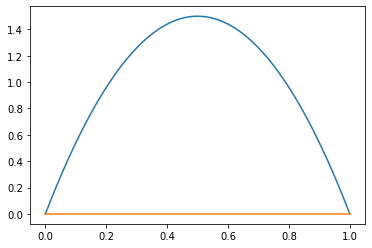

In [71]:
 # your code in this cell
plt.plot(t, prior)
plt.plot(t, posterior)

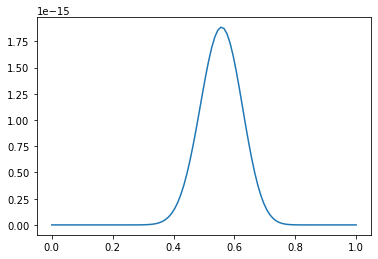

In [70]:
plt.plot(t, posterior)

### 5. Derive the MAP of $\theta$ and then use  the formula to define the function ``map_bernoulli``, which computes a MAP of Bernoulli distribution parameter.  

In [64]:
# Your code in this cell
def map_bernoulli(x):
    mapTheta = (sum(x)+1)/(2+len(x))
    return(mapTheta)

### 6. Find the MAP for $\theta$ by using  samples $\mathbb{x}$ 

In [65]:
# Your code in this cell
map_bernoulli(x)

0.5576923076923077